In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from MPCProblem import MPCProblem
from util import *
import cvxpy as cp
import warnings
import itertools
import time
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz
import pydotplus
from datetime import datetime
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.metrics import brier_score_loss
from scipy import stats
import matplotlib.dates as md
warnings.filterwarnings('ignore')

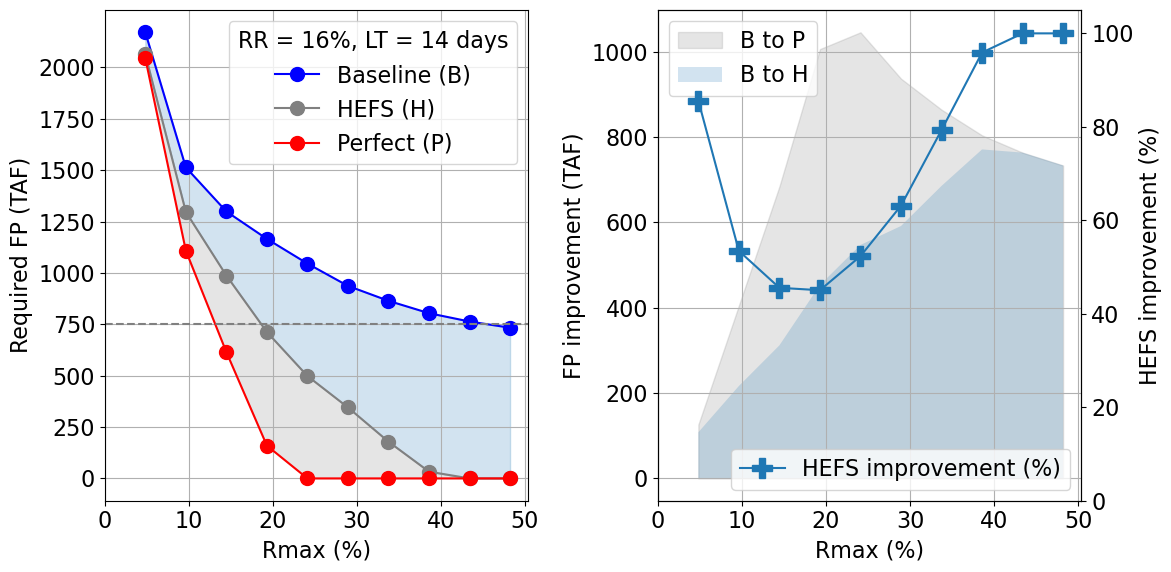

In [4]:
fontsize = 16
plt.rcParams.update({'font.size': fontsize})

# plot Rmax vs Ramping rate ^_^
# compare with baseline and perfect ^_^
# for single Rmax

# fig, ax = plt.subplots()
fig, ax = plt.subplots(1,2, figsize = (12,6))
#columns
# max_above_TOCS_baseline
# max_above_TOCS_perfect
# max_above_TOCS_hefs

# dimensionless Rmax
max_inflow_cfs = 310.995288

Rmax_range = range(150, 0, -15)

# RR_range = [50,40,30,20,10]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

RR_range = [50]

for n, RR in enumerate(RR_range):

    df_plot = pd.DataFrame(index = Rmax_range)
    
    for p, problem in enumerate(['baseline', 'perfect', 'hefs']):
    
        max_above_TOCS = []
        
        for Rmax in Rmax_range:
            df_temp = pd.read_csv('SA_output_new/Rmax%s_RR50to0.csv' %str(Rmax), index_col = 0)
            max_above_TOCS.append(df_temp['max_above_TOCS_%s' %problem].loc[RR])

        df_plot['max_above_TOCS_%s' %problem] = max_above_TOCS

    # dimensionless Rmax
    df_plot.index = 100 * df_plot.index / max_inflow_cfs
    
    # scale the hefs between 0 and 1 (lower limit: perfect, upper limit: baseline)
    # percent improvement has problem...
    temp1 = df_plot['max_above_TOCS_baseline'] - df_plot['max_above_TOCS_hefs']
    temp2 = df_plot['max_above_TOCS_baseline'] - df_plot['max_above_TOCS_perfect']
    temp3 = df_plot['max_above_TOCS_hefs'] - df_plot['max_above_TOCS_perfect']


  
    # denominator is the potential range of "improvement"



    df_plot['max_above_TOCS_baseline'].plot(ax = ax[0], marker = "o", color = 'blue', markersize = 10)
    df_plot['max_above_TOCS_hefs'].plot(ax = ax[0], marker = "o", color = 'gray', markersize = 10)
    df_plot['max_above_TOCS_perfect'].plot(ax = ax[0], marker = "o", color = 'red', markersize = 10)
    
    ax[0].fill_between(df_plot.index, 
                    df_plot['max_above_TOCS_baseline'], 
                    df_plot['max_above_TOCS_hefs'], 
                    color = colors[n], alpha = 0.2)

    ax[0].fill_between(df_plot.index, 
                    df_plot['max_above_TOCS_hefs'], 
                    df_plot['max_above_TOCS_perfect'], 
                    color = 'gray', alpha = 0.2)

    
    ax12 = ax[1].twinx()
    
    df_plot['max_above_TOCS_hefs_rescale'] = 100 * temp1 / temp2 
    df_plot['max_above_TOCS_hefs_rescale'].plot(ax = ax12, marker ="P", color = colors[0], markersize = 15)

    ax[1].fill_between(temp2.index, temp2.values, alpha = 0.2, color = 'gray')
    ax[1].fill_between(temp1.index, temp1.values, alpha = 0.2)

# ax[0].legend(title = 'RR (%)', labels = ["16"])
ax[0].legend(title = 'RR = 16%, LT = 14 days', labels = ['Baseline (B)', 'HEFS (H)', 'Perfect (P)'])
ax[0].set_xlabel('Rmax (%)')
ax[0].set_ylabel('Required FP (TAF)')
ax[0].axhline(750, color = 'gray', linestyle = "--")
ax[0].set_yticks(range(0,2250,250))
ax[0].set_xticks(range(0,60,10))
# ax[0].set_xlim(0,155)
# ax.set_xticklabels([0, 25, 50, 75, 100, 125, 150])
ax[0].grid()
# ax[0].axhline(750, color = 'gray', linestyle = "--")
# ax[0].axhline(375, color = 'gray', linestyle = "--")

# ax[1].set_xlim(0,155)
ax12.set_ylim(0, 105)
ax[1].set_ylabel('FP improvement (TAF)')
ax[1].set_xlabel('Rmax (%)')
ax[1].set_xticks(range(0,60,10))
ax[1].legend(labels = ['B to P', 'B to H'], loc = 2)
ax12.legend(['HEFS improvement (%)'], loc = 4)
ax[1].grid()

ax12.set_ylabel('HEFS improvement (%)')
plt.tight_layout()

# ax[0].invert_xaxis()
# ax[1].invert_xaxis()